In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
ziptrain = pd.read_csv("zip.train.csv",header=None)
ziptrain27 = ziptrain[(ziptrain.iloc[:,0] == 2) | (ziptrain.iloc[:,0] == 7)]

In [27]:
ziptrain27.describe()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
count,1376.00000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,...,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000
mean,4.34375,-0.984251,-0.922622,-0.837593,-0.707725,-0.516504,-0.337713,-0.215398,-0.177012,-0.236985,...,-0.459176,-0.328480,-0.533847,-0.822799,-0.905086,-0.889243,-0.849907,-0.852942,-0.907160,-0.972828
std,2.49602,0.105798,0.307493,0.439262,0.549117,0.656989,0.719407,0.749200,0.768320,0.752911,...,0.691796,0.754303,0.667315,0.431136,0.349080,0.367509,0.432005,0.429968,0.335022,0.148830
min,2.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,2.00000,-1.000000,-1.000000,-1.000000,-1.000000,-0.979000,-0.638000,-0.344000,-0.281500,-0.432000,...,-0.941500,-0.761500,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,7.00000,-1.000000,-1.000000,-1.000000,-0.684000,-0.047250,0.280500,0.494500,0.555000,0.493250,...,0.119750,0.435750,-0.097750,-0.992000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
max,7.00000,0.412000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.592000


In [4]:
ziptrain27[ziptrain27.iloc[:,0] == 2]

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
41,2,-1.0,-1.0,-1.0,-1.0,-1.000,-0.798,0.300,0.432,-0.799,...,-0.947,-0.524,0.307,0.390,0.852,0.751,0.990,0.567,-0.664,-1.0
52,2,-1.0,-1.0,-1.0,-1.0,-1.000,-0.638,0.222,0.706,1.000,...,-0.576,0.635,0.755,0.549,0.273,0.074,-0.083,-1.000,-1.000,-1.0
57,2,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
62,2,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
66,2,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7181,2,-1.0,-1.0,-1.0,-1.0,-0.991,-0.694,-0.768,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-0.898,-0.694,-0.982,-1.000,-1.0
7201,2,-1.0,-1.0,-1.0,-1.0,-0.867,-0.647,0.393,0.883,0.235,...,-0.851,-1.000,-1.000,-1.000,-1.000,-0.642,0.615,-0.337,-1.000,-1.0
7238,2,-1.0,-1.0,-1.0,-1.0,-0.112,0.893,-0.042,-0.979,-1.000,...,-0.280,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
7243,2,-1.0,-1.0,-1.0,-1.0,-0.750,-0.066,0.529,0.357,-0.734,...,0.599,0.387,-0.645,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


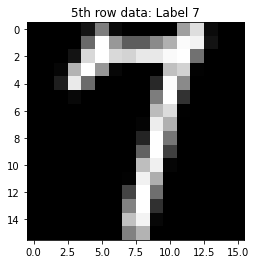

In [28]:
data_5 = ziptrain27.iloc[5,:][1:]
data_5_reshape = np.array(data_5).reshape((16,16))
plt.imshow(data_5_reshape, cmap='gray')
plt.title('5th row data: Label 7')
plt.show()

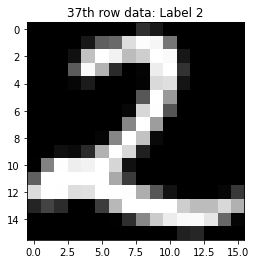

In [30]:
data_37 = ziptrain27.iloc[37,:][1:]
data_37_reshape = np.array(data_37).reshape((16,16))
plt.imshow(data_37_reshape, cmap='gray')
plt.title('37th row data: Label 2')
plt.show()

In [7]:
X_train = ziptrain27.iloc[:,1:]
y_train = ziptrain27.iloc[:,0]
lm = LinearRegression().fit(X_train, y_train)

In [8]:
y_logit = lm.predict(X_train)
y_predict = 2+5*(y_logit>=4.5)

In [9]:
lm_train_error = np.mean(y_predict != y_train)
lm_train_error

0.0007267441860465116

In [10]:
k_range = [1,3,5,7,9,11,13,15]
knn_train_errors = []
for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    y_knn_predict = knn_model.predict(X_train)
    knn_err = np.mean(y_knn_predict != y_train)
    knn_train_errors.append(knn_err)
knn_train_df = pd.DataFrame({'k value':k_range,'Train Errors':knn_train_errors})
knn_train_df

,k value,Train Errors
0,1,0.000000
1,3,0.010174
2,5,0.012355
3,7,0.014535
4,9,0.015988
5,11,0.015988
6,13,0.017442
7,15,0.017442


<AxesSubplot:title={'center':'Train Errors vs. k value'}, xlabel='k value'>

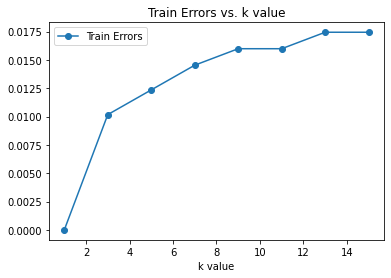

In [11]:
knn_train_df.plot.line('k value','Train Errors',title='Train Errors vs. k value',marker='o')

In [12]:
#Testing dataset
ziptest = pd.read_csv("zip.test.csv",header=None)
ziptest27 = ziptest[(ziptest.iloc[:,0] == 2) | (ziptest.iloc[:,0] == 7)]
ziptest27

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
11,2,-0.996,0.572,0.396,0.063,-0.506,-0.847,-1.000,-1.000,-1.000,...,-0.668,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
12,2,-1.000,-1.000,0.469,0.413,1.000,1.000,0.462,-0.116,-0.937,...,1.000,1.000,1.000,0.270,-0.280,-0.855,-1.000,-1.000,-1.000,-1.000
20,2,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
21,2,-1.000,-1.000,-1.000,-0.831,0.047,0.140,0.947,0.813,0.012,...,-0.915,-1.000,-1.000,-1.000,-1.000,-0.866,-0.672,0.131,0.135,-0.318
25,2,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.665,0.603,1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,0.720,0.711,-0.932,-1.000,-1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,7,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.982,-0.629,0.059,...,-1.000,0.189,0.373,-0.972,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
1964,2,-0.281,1.000,-0.123,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,0.487,0.983,1.000,0.651,-0.711,-1.000,-1.000,-1.000,-1.000,-1.000
1986,2,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
1997,7,-1.000,-1.000,-1.000,-1.000,-0.766,-0.883,-0.465,0.115,0.492,...,0.298,-0.845,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000


In [13]:
X_test = ziptest27.iloc[:,1:]
y_test = ziptest27.iloc[:,0]

In [14]:
y_test_logit = lm.predict(X_test)
y_test_predict = 2+5*(y_test_logit>=4.5)

In [15]:
lm_test_error = np.mean(y_test_predict != y_test)
lm_test_error

0.017391304347826087

In [16]:
k_range = [1,3,5,7,9,11,13,15]
knn_test_errors = []
for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    y_knn_test_predict = knn_model.predict(X_test)
    test_knn_err = np.mean(y_knn_test_predict != y_test)
    knn_test_errors.append(test_knn_err)
knn_test_df = pd.DataFrame({'k value':k_range,'Test Errors':knn_test_errors})
knn_test_df

,k value,Test Errors
0,1,0.017391
1,3,0.014493
2,5,0.014493
3,7,0.017391
4,9,0.017391
5,11,0.017391
6,13,0.020290
7,15,0.020290


<AxesSubplot:title={'center':'Test Errors vs. k value'}, xlabel='k value'>

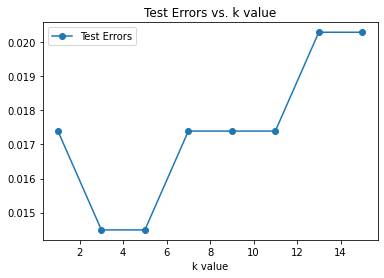

In [17]:
knn_test_df.plot.line('k value','Test Errors',title='Test Errors vs. k value',marker='o')

In [18]:
#Combine dataset
zipfull27 = pd.concat([ziptrain27,ziptest27], ignore_index=True)
zipfull27

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,7,-1.000,-1.0,-1.000,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0
1,7,-1.000,-1.0,-1.000,-1.000,-1.000,-0.596,0.912,1.000,0.290,...,-1.000,-0.795,0.663,-0.074,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0
2,7,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.632,...,-1.000,-0.967,0.866,-0.001,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0
3,7,-1.000,-1.0,-1.000,-0.929,0.351,0.798,0.806,0.114,0.015,...,0.835,-0.086,-0.991,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0
4,7,-1.000,-1.0,-1.000,-1.000,-0.869,0.777,-0.007,-0.697,-1.000,...,-0.933,0.667,-0.315,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,7,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-0.982,-0.629,0.059,...,-1.000,0.189,0.373,-0.972,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0
1717,2,-0.281,1.0,-0.123,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,0.487,0.983,1.000,0.651,-0.711,-1.000,-1.000,-1.00,-1.000,-1.0
1718,2,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0
1719,7,-1.000,-1.0,-1.000,-1.000,-0.766,-0.883,-0.465,0.115,0.492,...,0.298,-0.845,-1.000,-1.000,-1.000,-1.000,-1.000,-1.00,-1.000,-1.0


In [19]:
X_full = zipfull27.iloc[:,1:]
y_full = zipfull27.iloc[:,0]

In [20]:
B = 100 #total loop times
all_test_errors = []
k_range = [1,3,5,7,9,11,13,15]

for b in range(B):
    test_errors = []
    #Split train and test dataset based on random state
    X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(X_full, y_full, test_size=345, random_state=b)
    #Train LinearRegression
    lr_model = LinearRegression().fit(X_temp_train, y_temp_train)
    y_temp_test_logit = lr_model.predict(X_temp_test)
    y_temp_predict = 2+5*(y_temp_test_logit>=4.5)
    lm_test_error = np.mean(y_temp_predict != y_temp_test)
    test_errors.append(lm_test_error)
    #Train KNN
    for k in k_range:
        knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_temp_train,y_temp_train)
        y_knn_temp_test_predict = knn_model.predict(X_temp_test)
        test_knn_err = np.mean(y_knn_temp_test_predict != y_temp_test)
        test_errors.append(test_knn_err)
    all_test_errors.append(test_errors)

all_test_errors

[[0.017391304347826087,
  0.017391304347826087,
  0.020289855072463767,
  0.020289855072463767,
  0.02318840579710145,
  0.02318840579710145,
  0.02318840579710145,
  0.02608695652173913,
  0.02608695652173913],
 [0.011594202898550725,
  0.017391304347826087,
  0.017391304347826087,
  0.017391304347826087,
  0.014492753623188406,
  0.020289855072463767,
  0.02318840579710145,
  0.02318840579710145,
  0.02608695652173913],
 [0.008695652173913044,
  0.014492753623188406,
  0.014492753623188406,
  0.020289855072463767,
  0.02608695652173913,
  0.02318840579710145,
  0.020289855072463767,
  0.02318840579710145,
  0.02318840579710145],
 [0.008695652173913044,
  0.008695652173913044,
  0.008695652173913044,
  0.008695652173913044,
  0.011594202898550725,
  0.008695652173913044,
  0.008695652173913044,
  0.011594202898550725,
  0.011594202898550725],
 [0.011594202898550725,
  0.011594202898550725,
  0.011594202898550725,
  0.017391304347826087,
  0.017391304347826087,
  0.020289855072463767,


In [21]:
all_test_errors = np.array(all_test_errors)

In [22]:
index_names = ['LR','KNN1','KNN3','KNN5','KNN7','KNN9','KNN11','KNN13','KNN15']
all_test_err_df = pd.DataFrame({'Mean':np.mean(all_test_errors,axis=0),
                                'Variance':np.var(all_test_errors, axis=0)},
                               index=index_names)
all_test_err_df

,Mean,Variance
LR,0.010783,0.000036
KNN1,0.012667,0.000028
KNN3,0.013304,0.000032
KNN5,0.015188,0.000035
KNN7,0.016522,0.000041
KNN9,0.017217,0.000047
KNN11,0.018377,0.000042
KNN13,0.019188,0.000035
KNN15,0.019739,0.000037


<AxesSubplot:title={'center':'Mean Error vs. Model'}>

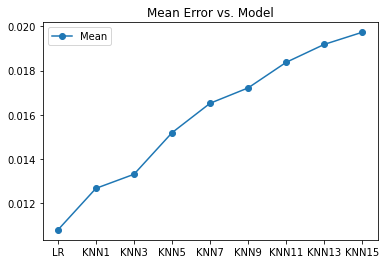

In [23]:
all_test_err_df.plot.line(y='Mean',title='Mean Error vs. Model', marker='o')

<AxesSubplot:title={'center':'Error Variance vs. Model'}>

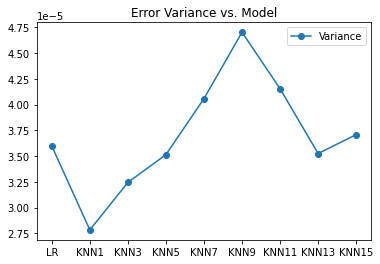

In [24]:
all_test_err_df.plot.line(y='Variance',title='Error Variance vs. Model', marker='o')